In [46]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [47]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [48]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [49]:
train.tail()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1


In [50]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [51]:
train.describe(include="O")

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2013-11-18,水,メンチカツ,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


In [52]:
train.shape

(207, 12)

In [53]:
train["year"] = train["datetime"].apply(lambda x: x.split("-")[0])
train["month"] = train["datetime"].apply(lambda x: x.split("-")[1])
train["date"] = train["datetime"].apply(lambda x: x.split("-")[2])

In [54]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
year               0
month              0
date               0
dtype: int64

In [55]:
train["kcal"] = train["kcal"].fillna(train["kcal"].mean())

In [56]:
train["remarks"].value_counts()

お楽しみメニュー                    12
料理長のこだわりメニュー                 5
鶏のレモンペッパー焼（50食）、カレー（42食）     1
酢豚（28食）、カレー（85食）             1
手作りの味                        1
スペシャルメニュー（800円）              1
Name: remarks, dtype: int64

In [59]:
def remarks_to_num(x):
    if x == "お楽しみメニュー":
        return 6
    elif x =="料理長のこだわりメニュー":
        return 5
    elif x =="酢豚（28食）、カレー（85食）":
        return 4
    elif x =="鶏のレモンペッパー焼（50食）、カレー（42食） ":
        return 3
    elif x =="手作りの味":
        return 2
    elif x =="スペシャルメニュー（800円）":
        return 1
    else:
        return 0

In [60]:
train["remarks_num"] = train["remarks"].apply(lambda x: remarks_to_num(x))

In [61]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,date,remarks_num
0,2013-11-18,90,月,0,厚切りイカフライ,404.409639,NaN,NaN,NaN,快晴,--,19.8,2013,11,18,0
1,2013-11-19,101,火,1,手作りヒレカツ,404.409639,NaN,NaN,NaN,快晴,--,17.0,2013,11,19,0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,404.409639,NaN,NaN,NaN,快晴,--,15.5,2013,11,20,0
3,2013-11-21,120,木,1,若鶏ピリ辛焼,404.409639,NaN,NaN,NaN,快晴,--,15.2,2013,11,21,0
4,2013-11-22,130,金,1,ビッグメンチカツ,404.409639,NaN,NaN,NaN,快晴,--,16.1,2013,11,22,0


In [63]:
train.corr()

,y,soldout,kcal,payday,temperature,remarks_num
y,1.000000,0.098308,0.107327,NaN,-0.655332,0.078472
soldout,0.098308,1.000000,0.043698,NaN,-0.156752,-0.108014
kcal,0.107327,0.043698,1.000000,NaN,-0.041905,0.052068
payday,NaN,NaN,NaN,NaN,NaN,NaN
temperature,-0.655332,-0.156752,-0.041905,NaN,1.000000,0.232351
remarks_num,0.078472,-0.108014,0.052068,NaN,0.232351,1.000000


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           207 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
 12  year           207 non-null    object 
 13  month          207 non-null    object 
 14  date           207 non-null    object 
 15  remarks_num    207 non-null    int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 26.0+ KB


In [68]:
train["year"] = train["year"].astype(np.int)
train["month"] = train["month"].astype(np.int)
train["date"] = train["date"].astype(np.int)

/var/folders/g2/x8kbv4kd79s7rrkz1k5k4f2m0000gn/T/ipykernel_84604/3278783824.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train["year"] = train["year"].astype(np.int)
/var/folders/g2/x8kbv4kd79s7rrkz1k5k4f2m0000gn/T/ipykernel_84604/3278783824.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

In [69]:
train.corr()

,y,soldout,kcal,payday,temperature,year,month,date,remarks_num
y,1.000000,0.098308,1.073266e-01,NaN,-0.655332,-5.750986e-01,0.010435,-0.068643,0.078472
soldout,0.098308,1.000000,4.369753e-02,NaN,-0.156752,-1.193493e-02,-0.102884,-0.081096,-0.108014
kcal,0.107327,0.043698,1.000000e+00,NaN,-0.041905,-1.142987e-13,-0.033538,0.033117,0.052068
payday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,-0.655332,-0.156752,-4.190471e-02,NaN,1.000000,3.013310e-01,0.370592,0.018460,0.232351
year,-0.575099,-0.011935,-1.142987e-13,NaN,0.301331,1.000000e+00,-0.690157,-0.037334,0.124684
month,0.010435,-0.102884,-3.353766e-02,NaN,0.370592,-6.901569e-01,1.000000,-0.044679,0.022296
date,-0.068643,-0.081096,3.311717e-02,NaN,0.018460,-3.733444e-02,-0.044679,1.000000,0.081345
remarks_num,0.078472,-0.108014,5.206811e-02,NaN,0.232351,1.246842e-01,0.022296,0.081345,1.000000


In [70]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,date,remarks_num
0,2013-11-18,90,月,0,厚切りイカフライ,404.409639,NaN,NaN,NaN,快晴,--,19.8,2013,11,18,0
1,2013-11-19,101,火,1,手作りヒレカツ,404.409639,NaN,NaN,NaN,快晴,--,17.0,2013,11,19,0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,404.409639,NaN,NaN,NaN,快晴,--,15.5,2013,11,20,0
3,2013-11-21,120,木,1,若鶏ピリ辛焼,404.409639,NaN,NaN,NaN,快晴,--,15.2,2013,11,21,0
4,2013-11-22,130,金,1,ビッグメンチカツ,404.409639,NaN,NaN,NaN,快晴,--,16.1,2013,11,22,0


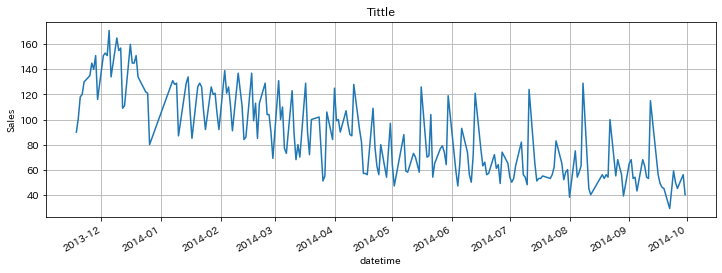

In [79]:
train.index = pd.to_datetime(train["datetime"])
ax = train["y"].plot(figsize=(12,4), grid = True, title="Tittle")
ax.set_ylabel("Sales")
train = train.reset_index(drop=True)

In [80]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,date,remarks_num
0,2013-11-18,90,月,0,厚切りイカフライ,404.409639,NaN,NaN,NaN,快晴,--,19.8,2013,11,18,0
1,2013-11-19,101,火,1,手作りヒレカツ,404.409639,NaN,NaN,NaN,快晴,--,17.0,2013,11,19,0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,404.409639,NaN,NaN,NaN,快晴,--,15.5,2013,11,20,0
3,2013-11-21,120,木,1,若鶏ピリ辛焼,404.409639,NaN,NaN,NaN,快晴,--,15.2,2013,11,21,0
4,2013-11-22,130,金,1,ビッグメンチカツ,404.409639,NaN,NaN,NaN,快晴,--,16.1,2013,11,22,0


In [81]:
from sklearn.linear_model import LinearRegression as LR

In [85]:
trainX = pd.get_dummies(train[["week","kcal","temperature", "year", "month", "date", "remarks_num"]])
y = train["y"]

In [86]:
model = LR()

In [87]:
model.fit(trainX,y)

LinearRegression()

In [88]:
train["res"] =model.predict(trainX)

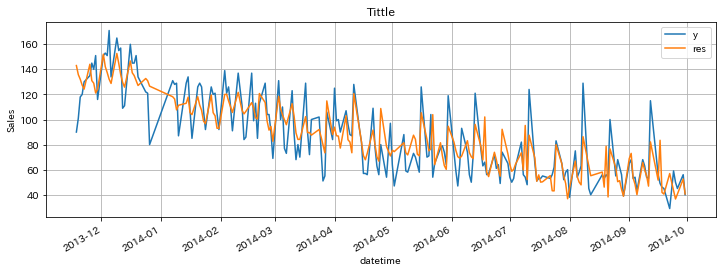

In [89]:
train.index = pd.to_datetime(train["datetime"])
ax = train[["y", "res"]].plot(figsize=(12,4), grid = True, title="Tittle")
ax.set_ylabel("Sales")
train = train.reset_index(drop=True)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Duplicate key in file PosixPath('/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : IPAexGothic')


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [12]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [13]:
test.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


In [4]:
train.tail()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1


In [6]:
train.shape

(207, 12)

In [8]:
train.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [10]:
train.describe(include = "O")

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2013-11-18,水,メンチカツ,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


In [11]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [50]:
train["kcal"] = train["kcal"].fillna(train["kcal"].mean())
test["kcal"] = test["kcal"].fillna(test["kcal"].mean())

In [51]:
train["year"] = train["datetime"].apply(lambda x: x.split("-")[0])
train["month"] = train["datetime"].apply(lambda x: x.split("-")[1])
train["day"] = train["datetime"].apply(lambda x: x.split("-")[2])

test["year"] = test["datetime"].apply(lambda x: x.split("-")[0])
test["month"] = test["datetime"].apply(lambda x: x.split("-")[1])
test["day"] = test["datetime"].apply(lambda x: x.split("-")[2])

In [18]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,day
0,2013-11-18,90,月,0,厚切りイカフライ,404.409639,NaN,NaN,NaN,快晴,--,19.8,2013,11,18
1,2013-11-19,101,火,1,手作りヒレカツ,404.409639,NaN,NaN,NaN,快晴,--,17.0,2013,11,19
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,404.409639,NaN,NaN,NaN,快晴,--,15.5,2013,11,20
3,2013-11-21,120,木,1,若鶏ピリ辛焼,404.409639,NaN,NaN,NaN,快晴,--,15.2,2013,11,21
4,2013-11-22,130,金,1,ビッグメンチカツ,404.409639,NaN,NaN,NaN,快晴,--,16.1,2013,11,22


In [63]:
# pd.get_dummies(train["week"])

In [65]:
# pd.get_dummies(train["weather"])

In [67]:
train["weather"].value_counts()

快晴    53
曇     53
晴れ    50
薄曇    25
雨     24
雪      1
雷電     1
Name: weather, dtype: int64

In [199]:
test["weather"].value_counts()

快晴    12
曇      9
雨      8
晴れ     7
薄曇     4
Name: weather, dtype: int64

In [137]:
index_snow = train["weather"].index[train["weather"] == "雪"].tolist()
index_thunder = train["weather"].index[train["weather"] == "雷電"].tolist()

In [148]:
drop_list = index_snow + index_thunder

In [149]:
train.drop(drop_list, inplace=True)

In [151]:
train["name"].value_counts()

タンドリーチキン         6
メンチカツ            6
手作りロースカツ         5
マーボ豆腐            4
回鍋肉              4
                ..
白身魚唐揚げ野菜あんかけ     1
ポークハヤシ           1
酢豚orカレー          1
ハンバーグ和風きのこソース    1
鶏肉とカシューナッツ炒め     1
Name: name, Length: 155, dtype: int64

In [152]:
train["remarks"].value_counts()

お楽しみメニュー                    12
料理長のこだわりメニュー                 4
鶏のレモンペッパー焼（50食）、カレー（42食）     1
酢豚（28食）、カレー（85食）             1
手作りの味                        1
スペシャルメニュー（800円）              1
Name: remarks, dtype: int64

In [153]:
train["event"].value_counts()

ママの会             9
キャリアアップ支援セミナー    5
Name: event, dtype: int64

In [154]:
train["payday"].value_counts()

1.0    10
Name: payday, dtype: int64

In [155]:
train["precipitation"].value_counts()

--     169
0       22
0.5      8
1.5      2
1        1
6        1
6.5      1
2.5      1
Name: precipitation, dtype: int64

In [156]:
def classifyRemarks(x):
    if x == "お楽しみメニュー":
        return 6
    elif x =="料理長のこだわりメニュー":
        return 5
    elif x =="酢豚（28食）、カレー（85食）":
        return 4
    elif x =="鶏のレモンペッパー焼（50食）、カレー（42食） ":
        return 3
    elif x =="手作りの味":
        return 2
    elif x =="スペシャルメニュー（800円）":
        return 1
    else:
        return 0

In [157]:
train["remarks1"] = train["remarks"].apply(lambda x: classifyRemarks(x))
test["remarks1"] = test["remarks"].apply(lambda x: classifyRemarks(x))

In [158]:
def classifyEvents(x):
    if x == "ママの会":
        return 2
    elif x == "キャリアアップ支援セミナー":
        return 1
    else:
        return 0

In [159]:
train["event1"] = train["event"].apply(lambda x: classifyEvents(x))
test["event1"] = test["event"].apply(lambda x: classifyEvents(x))

In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 206
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       205 non-null    object 
 1   y              205 non-null    int64  
 2   week           205 non-null    object 
 3   soldout        205 non-null    int64  
 4   name           205 non-null    object 
 5   kcal           205 non-null    float64
 6   remarks        20 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        205 non-null    object 
 10  precipitation  205 non-null    object 
 11  temperature    205 non-null    float64
 12  year           205 non-null    int64  
 13  month          205 non-null    int64  
 14  day            205 non-null    int64  
 15  remarks1       205 non-null    int64  
 16  event1         205 non-null    int64  
 17  pred           205 non-null    float64
 18  res       

In [161]:
train["year"] = train["year"].astype(np.int)
train["month"] = train["month"].astype(np.int)
train["day"] = train["day"].astype(np.int)

test["year"] = test["year"].astype(np.int)
test["month"] = test["month"].astype(np.int)
test["day"] = test["day"].astype(np.int)

/var/folders/g2/x8kbv4kd79s7rrkz1k5k4f2m0000gn/T/ipykernel_40210/4057179517.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train["year"] = train["year"].astype(np.int)
/var/folders/g2/x8kbv4kd79s7rrkz1k5k4f2m0000gn/T/ipykernel_40210/4057179517.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

In [162]:
train[["y","kcal","temperature","year","month","day","remarks1","event1"]].corr()

,y,kcal,temperature,year,month,day,remarks1,event1
y,1.000000,0.112494,-0.664461,-0.574964,0.008958,-0.065654,0.094143,-0.038400
kcal,0.112494,1.000000,-0.031669,-0.003721,-0.026429,0.031634,0.042503,-0.052195
temperature,-0.664461,-0.031669,1.000000,0.309006,0.363494,0.016264,0.236856,-0.018017
year,-0.574964,-0.003721,0.309006,1.000000,-0.690387,-0.038236,0.122355,0.037454
month,0.008958,-0.026429,0.363494,-0.690387,1.000000,-0.045392,0.025065,-0.021411
day,-0.065654,0.031634,0.016264,-0.038236,-0.045392,1.000000,0.073284,0.064782
remarks1,0.094143,0.042503,0.236856,0.122355,0.025065,0.073284,1.000000,0.214566
event1,-0.038400,-0.052195,-0.018017,0.037454,-0.021411,0.064782,0.214566,1.000000


In [163]:
from sklearn.linear_model import LinearRegression as LR

In [164]:
trainX = pd.get_dummies(train[["kcal","temperature","year","week","weather"]])
y = train["y"]

In [165]:
model = LR()

In [166]:
model.fit(trainX,y)

LinearRegression()

In [167]:
model.coef_

array([  0.12702258,  -2.14889743, -39.14035284,   9.06994325,
        -8.25802066,  -2.15648676,  -0.06687125,   1.41143542,
         1.14501391,   3.85862416,  -3.92663436,   0.51206989,
        -1.58907361])

In [168]:
model.intercept_

78900.39366675289

## for Test

In [169]:
testX = pd.get_dummies(test[["kcal","temperature","year","week","weather"]])

In [170]:
trainX.head()

,kcal,temperature,year,week_月,week_木,week_水,week_火,week_金,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨
0,404.409639,19.8,2013,1,0,0,0,0,1,0,0,0,0
1,404.409639,17.0,2013,0,0,0,1,0,1,0,0,0,0
2,404.409639,15.5,2013,0,0,1,0,0,1,0,0,0,0
3,404.409639,15.2,2013,0,1,0,0,0,1,0,0,0,0
4,404.409639,16.1,2013,0,0,0,0,1,1,0,0,0,0


In [171]:
testX.head()

,kcal,temperature,year,week_月,week_木,week_水,week_火,week_金,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨
0,420.0,20.2,2014,0,0,1,0,0,0,0,0,0,1
1,415.0,23.9,2014,0,1,0,0,0,0,0,1,0,0
2,405.0,28.7,2014,0,0,0,0,1,0,1,0,0,0
3,400.0,21.5,2014,1,0,0,0,0,0,0,0,0,1
4,430.0,22.1,2014,0,0,0,1,0,0,1,0,0,0


In [172]:
pred = model.predict(testX)

In [174]:
train["pred"] = model.predict(trainX)

In [175]:
train["res"] = train["y"] - train["pred"]

In [195]:
train.sort_values(by="res",ascending=False)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,day,remarks1,event1,pred,res
174,2014-8-8,129,金,0,チキンカレー,404.409639,お楽しみメニュー,NaN,1.0,曇,--,31.1,2014,8,8,6,0,53.746298,75.253702
155,2014-7-11,124,金,0,ポークカレー,404.409639,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,11,6,0,55.514644,68.485356
135,2014-6-13,121,金,0,キーマカレー,404.409639,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,13,6,0,64.969793,56.030207
125,2014-5-30,119,金,0,チキンカレー,404.409639,お楽しみメニュー,NaN,NaN,薄曇,--,26.9,2014,5,30,6,0,67.210372,51.789628
115,2014-5-16,126,金,0,ポークカレー,404.409639,お楽しみメニュー,ママの会,NaN,快晴,--,23.8,2014,5,16,6,2,74.504898,51.495102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2014-5-2,47,金,0,鶏の天ぷら,420.000000,NaN,NaN,NaN,晴れ,--,23.3,2014,5,2,0,0,80.273285,-33.273285
69,2014-3-7,73,金,1,ボローニャ風カツ,396.000000,NaN,NaN,NaN,快晴,--,7.0,2014,3,7,0,0,109.538161,-36.538161
0,2013-11-18,90,月,0,厚切りイカフライ,404.409639,NaN,NaN,NaN,快晴,--,19.8,2013,11,18,0,0,129.899348,-39.899348
201,2014-9-22,29,月,0,筑前煮,395.000000,NaN,NaN,NaN,晴れ,--,25.2,2014,9,22,0,0,80.673323,-51.673323


## Graph

<AxesSubplot:>

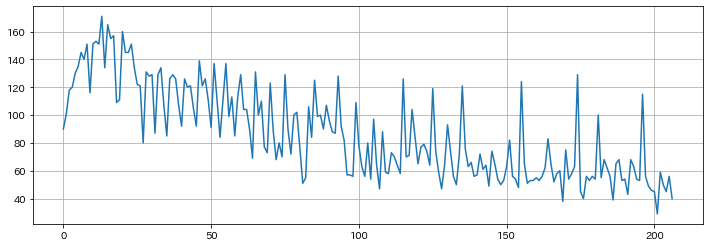

In [177]:
train["y"].plot(figsize=(12,4),grid=True, )

In [194]:
# y = train["y"]
# x = train["datetime"]
# plt.plot(x,y)

Text(0, 0.5, 'Sales')

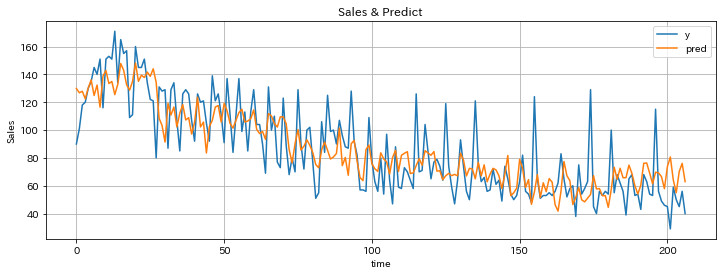

In [196]:
ax = train[["y","pred"]].plot(figsize=(12,4),grid=True, title="Sales & Predict")
ax.set_xlabel("time")
ax.set_ylabel("Sales")

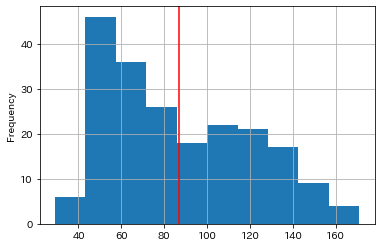

In [193]:
train["y"].plot.hist(grid=True)
plt.axvline(x=train["y"].mean(), color="red")

## Appendix

In [ ]:
sample[1] = pred

In [ ]:
train["pred"] = model1.predict(trainX)

In [ ]:
train["res"] = train["y"] - train["pred"]

In [ ]:
train.sort_values(by="res",ascending=False)

In [ ]:
sample.to_csv("submit6.csv", index=None, header=None)

# Graph

<AxesSubplot:>

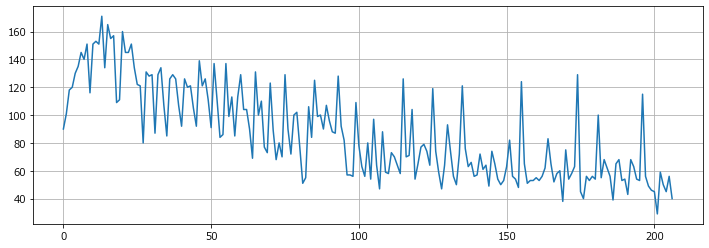

In [68]:
train["y"].plot(figsize=(12,4),grid=True, )

<AxesSubplot:>

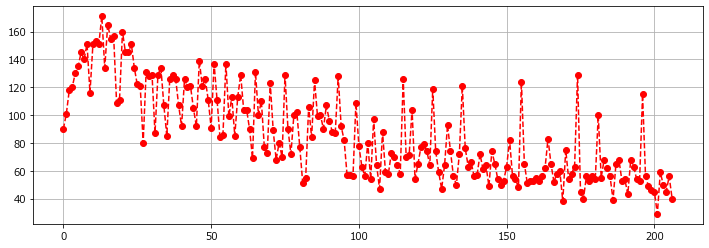

In [69]:
train["y"].plot(figsize=(12,4),grid=True, marker="o", color = "red", linestyle = "--")

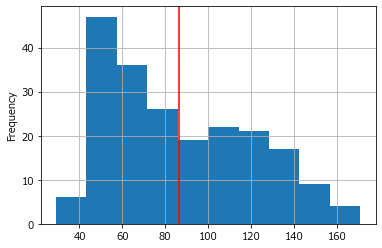

In [70]:
train["y"].plot.hist(grid=True)
plt.axvline(x=train["y"].mean(), color="red")

<AxesSubplot:title={'center':'y'}, xlabel='[week]'>

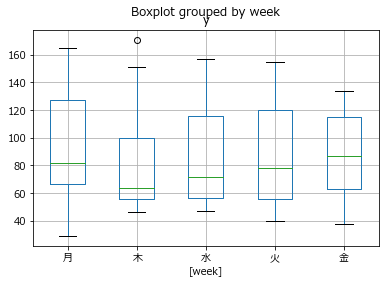

In [71]:
train[["y","week"]].boxplot(by="week")

<AxesSubplot:xlabel='temperature', ylabel='y'>

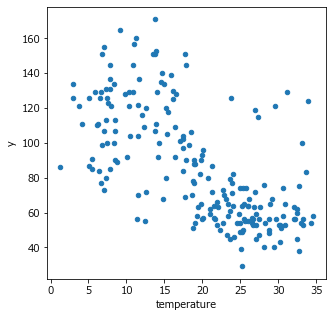

In [73]:
train[["y","temperature"]].plot.scatter(x="temperature", y="y",figsize=(5,5))